In [1]:
import pandas as pd

df = pd.read_excel("BD/06_MATRICULAS_ED_SUPERIOR_VALPARAISO_2021.xlsx")

df

,ID,GENERO,EDAD,RANGO EDAD,AÑO INGRESO,SEMESTRE INGRESO,TIPO DE INSTITUCION,NOMBRE DE INSTITUCION,ACREDITACION INSTITUCIONAL,PERIODO DE ACREDITACION,...,NIVEL CARRERA,AREA CONOCIMIENTO,DURACION PLAN DE ESTUDIO (SEMESTRES),DURACION PROCESO TITULACION (SEMESTRES),DURACION TOTAL CARRERA (SEMESTRES),VALOR MATRICULA (PESOS),VALOR ARANCEL (PESOS),REGION SEDE,PROVINCIA SEDE,COMUNA SEDE
0,10,Femenino,24,20 a 24,2016,Primer semestre,Universidades Privadas,UNIVERSIDAD SANTO TOMAS,ACREDITADA,31/03/2021 AL 31/03/2025,...,Carreras Profesionales,Salud,10,0,10,130000,3713000,Valparaiso,Valparaiso,Vina Del Mar
1,25,Femenino,19,15 a 19,2021,Primer semestre,Institutos Profesionales,IP INSTITUTO DE ESTUDIOS BANCARIOS GUILLERMO S...,ACREDITADA,17/12/2017 AL 17/12/2022,...,Carreras Profesionales,Administracion y Comercio,8,0,8,190000,1900000,Valparaiso,Valparaiso,Vina Del Mar
2,28,Masculino,24,20 a 24,2019,Primer semestre,Institutos Profesionales,IP AIEP,ACREDITADA,22/10/2017 AL 22/10/2022,...,Carreras Profesionales,Administracion y Comercio,8,1,8,190000,1760000,Valparaiso,San Felipe De Aconcagua,San Felipe
3,29,Masculino,24,20 a 24,2015,Primer semestre,Universidades CRUCH,PONTIFICIA UNIVERSIDAD CATOLICA DE VALPARAISO,ACREDITADA,26/11/2015 AL 26/11/2021,...,Carreras Profesionales,Educacion,9,0,9,208000,2558000,Valparaiso,Valparaiso,Valparaiso
4,42,Masculino,26,25 a 29,2014,Primer semestre,Universidades CRUCH,UNIVERSIDAD TECNICA FEDERICO SANTA MARIA,ACREDITADA,29/12/2016 AL 29/12/2022,...,Carreras Profesionales,Arte y Arquitectura,10,1,11,186000,4350000,Valparaiso,Valparaiso,Valparaiso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109193,1048489,Masculino,40,40 y mas,2015,Segundo semestre,Universidades Privadas,UNIVERSIDAD DE LAS AMERICAS,ACREDITADA,17/03/2019 AL 17/03/2023,...,Carreras Profesionales,Ciencias Sociales,11,0,11,170000,4000000,Valparaiso,Valparaiso,Vina Del Mar
109194,1048493,Masculino,23,20 a 24,2021,Primer semestre,Institutos Profesionales,IP DUOC UC,ACREDITADA,26/08/2017 AL 26/08/2024,...,Carreras Tecnicas,Ciencias Basicas,5,1,5,176000,2060000,Valparaiso,Valparaiso,Valparaiso
109195,1048494,Masculino,23,20 a 24,2017,Primer semestre,Universidades CRUCH,UNIVERSIDAD DE PLAYA ANCHA DE CIENCIAS DE LA E...,ACREDITADA,27/09/2016 AL 27/09/2021,...,Carreras Profesionales,Educacion,9,1,9,152000,2465000,Valparaiso,Valparaiso,Valparaiso
109196,1048503,Masculino,35,35 a 39,2020,Primer semestre,Institutos Profesionales,IP AIEP,ACREDITADA,22/10/2017 AL 22/10/2022,...,Carreras Tecnicas,Administracion y Comercio,5,1,5,190000,1880000,Valparaiso,San Antonio,San Antonio


Funcion para armar la tabla de frecuencia de variables CUALITATIVAS de los dos tipos.

+ Genero                                 (NOMINAL)
+ Tipo de institución                    (NOMINAL)
+ Nombre de institución                  (NOMINAL)
+ Acreditación instutucional             (NOMINAL)
+ Nivel de carrera                       (NOMINAL)
+ Área de conocimiento                   (NOMINAL)
+ Semestre ingreso                       (Ordinal)
+ Rango Edad                             (Ordinal)
+ Perío de acreditacion                  (Ordinal)

NOTA:
+ fi: frecuencia absoluta
+ hi_%: frecuencia relativa (%)
+ Fi: frecuencia acumulada
+ Hi_%: relativa acumulada


In [2]:
def freq_table_cualitativa(serie):
    tabla = serie.value_counts().rename("fi").reset_index()
    tabla.columns = ["Categoria", "fi"]
    total = tabla["fi"].sum()
    tabla["hi_%"] = (tabla["fi"] / total * 100).round(2)
    tabla["Fi"] = tabla["fi"].cumsum()
    tabla["Hi_%"] = tabla["hi_%"].cumsum().round(2)
    return tabla

tabla_genero = freq_table_cualitativa(df["GENERO"])
print(tabla_genero)

   Categoria     fi   hi_%      Fi    Hi_%
0   Femenino  58251  53.34   58251   53.34
1  Masculino  50947  46.66  109198  100.00


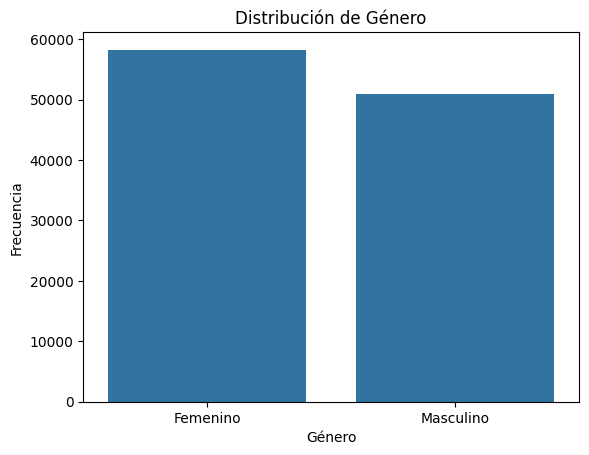

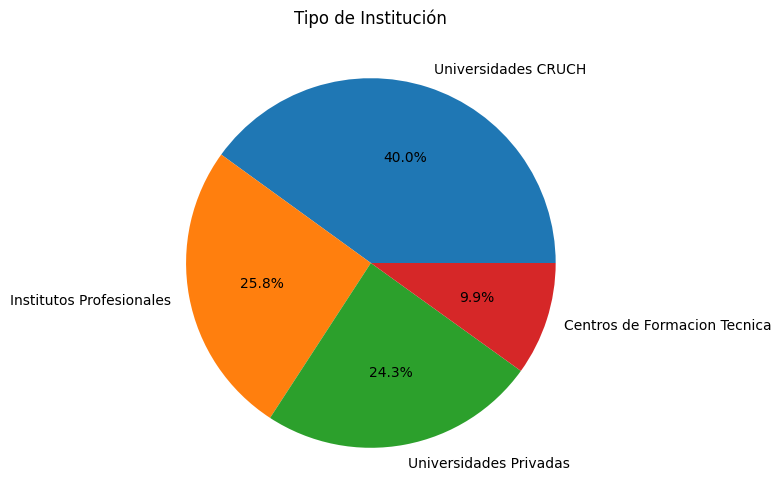

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras - Género
sns.countplot(data=df, x="GENERO")
plt.title("Distribución de Género")
plt.xlabel("Género")
plt.ylabel("Frecuencia")
plt.show()

# Gráfico de torta - Tipo de Institución
df["TIPO DE INSTITUCION"].value_counts().plot(
    kind="pie", autopct="%.1f%%", figsize=(6,6))
plt.title("Tipo de Institución")
plt.ylabel("")  # ocultar etiqueta
plt.show()

In [4]:
tabla_tipo_institucion = freq_table_cualitativa(df["TIPO DE INSTITUCION"])
print(tabla_tipo_institucion)

                      Categoria     fi   hi_%      Fi    Hi_%
0           Universidades CRUCH  43702  40.02   43702   40.02
1      Institutos Profesionales  28172  25.80   71874   65.82
2        Universidades Privadas  26485  24.25   98359   90.07
3  Centros de Formacion Tecnica  10839   9.93  109198  100.00


In [5]:
tabla_nombre_instutucion = freq_table_cualitativa(df["NOMBRE DE INSTITUCION"])
print(tabla_nombre_instutucion)

                                            Categoria     fi   hi_%      Fi  \
0                                          IP DUOC UC  14923  13.67   14923   
1       PONTIFICIA UNIVERSIDAD CATOLICA DE VALPARAISO  14904  13.65   29827   
2                           UNIVERSIDAD DE VALPARAISO  12860  11.78   42687   
3            UNIVERSIDAD TECNICA FEDERICO SANTA MARIA   9788   8.96   52475   
4                            UNIVERSIDAD ANDRES BELLO   9703   8.89   62178   
5                                             IP AIEP   8332   7.63   70510   
6                         UNIVERSIDAD DE VINA DEL MAR   7679   7.03   78189   
7   UNIVERSIDAD DE PLAYA ANCHA DE CIENCIAS DE LA E...   6150   5.63   84339   
8                                            CFT PUCV   5256   4.81   89595   
9                         UNIVERSIDAD DE LAS AMERICAS   2727   2.50   92322   
10                                         CFT INACAP   2100   1.92   94422   
11                          UNIVERSIDAD ADOLFO IBANE

In [6]:
tabla_nivel_carrera = freq_table_cualitativa(df["NIVEL CARRERA"])
print(tabla_nivel_carrera)

                Categoria     fi   hi_%      Fi    Hi_%
0  Carreras Profesionales  78035  71.46   78035   71.46
1       Carreras Tecnicas  27238  24.94  105273   96.40
2                Magister   2391   2.19  107664   98.59
3               Postitulo   1013   0.93  108677   99.52
4               Doctorado    521   0.48  109198  100.00


In [7]:
tabla_comuna_sede = freq_table_cualitativa(df["COMUNA SEDE"])
print(tabla_comuna_sede)

      Categoria     fi   hi_%      Fi    Hi_%
0    Valparaiso  52971  48.51   52971   48.51
1  Vina Del Mar  43541  39.87   96512   88.38
2    San Felipe   5118   4.69  101630   93.07
3      Quillota   2806   2.57  104436   95.64
4   San Antonio   1781   1.63  106217   97.27
5     Los Andes   1106   1.01  107323   98.28
6      La Ligua    630   0.58  107953   98.86
7       Limache    554   0.51  108507   99.37
8     La Calera    518   0.47  109025   99.84
9       Quilpue    173   0.16  109198  100.00


In [8]:
tabla_rango_edad = freq_table_cualitativa(df["RANGO EDAD"])
print(tabla_rango_edad)

  Categoria     fi   hi_%      Fi   Hi_%
0  20 a 24   55143  50.50   55143  50.50
1  15 a 19   19295  17.67   74438  68.17
2  25 a 29   18349  16.80   92787  84.97
3  30 a 34    7660   7.01  100447  91.98
4  40 y mas   4665   4.27  105112  96.25
5  35 a 39    4086   3.74  109198  99.99


In [9]:
tabla_periodo_acreditacion = freq_table_cualitativa(df["PERIODO DE ACREDITACION"])
print(tabla_periodo_acreditacion)

                   Categoria     fi   hi_%      Fi    Hi_%
0   26/08/2017 AL 26/08/2024  14923  14.27   14923   14.27
1   26/11/2015 AL 26/11/2021  14904  14.25   29827   28.52
2   25/10/2017 AL 25/10/2022  12860  12.30   42687   40.82
3   29/12/2016 AL 29/12/2022   9788   9.36   52475   50.18
4   24/12/2017 AL 24/12/2022   9703   9.28   62178   59.46
5   22/10/2017 AL 22/10/2022   8332   7.97   70510   67.43
6   09/12/2019 AL 09/12/2022   7679   7.34   78189   74.77
7   27/09/2016 AL 27/09/2021   6150   5.88   84339   80.65
8   30/11/2017 AL 30/11/2021   5256   5.03   89595   85.68
9   17/03/2019 AL 17/03/2023   2727   2.61   92322   88.29
10  05/01/2018 AL 05/01/2025   2100   2.01   94422   90.30
11  18/11/2015 AL 18/11/2020   2080   1.99   96502   92.29
12  31/03/2021 AL 31/03/2025   2056   1.97   98558   94.26
13  20/12/2019 AL 20/12/2024   1758   1.68  100316   95.94
14  11/12/2016 AL 11/12/2022   1360   1.30  101676   97.24
15  20/01/2021 AL 20/01/2026    744   0.71  102420   97.

Funcion para armar la tabla de frecuencia de variables CUANTITATIVAS discretas.

+ AÑO INGRESO
+ DURACIÓN PLAN DE ESTUDIO (SEMESTRES)
+ DURACIÓN PROCESO TITULACIÓN (SEMESTRES)
+ DURACIÓN TOTAL CARRERA (SEMESTRES)
+ VALOR MATRÍCULA (PESOS)
+ VALOR ARANCEL (PESOS)


NOTA:
+ fi: frecuencia absoluta
+ hi_%: frecuencia relativa (%)
+ Fi: frecuencia acumulada
+ Hi_%: relativa acumulada

In [10]:
def freq_table_discreta(serie):
    tabla = serie.value_counts().sort_index().rename("fi").reset_index()
    tabla.columns = ["Valor", "fi"]
    total = tabla["fi"].sum()
    tabla["hi_%"] = (tabla["fi"]/total*100).round(2)
    tabla["Fi"] = tabla["fi"].cumsum()
    tabla["Hi_%"] = tabla["hi_%"].cumsum().round(2)
    return tabla

tabla_año_ingreso = freq_table_discreta(df["AÑO INGRESO"])
print(tabla_año_ingreso)

    Valor     fi   hi_%      Fi    Hi_%
0    1994      1   0.00       1    0.00
1    1996      1   0.00       2    0.00
2    1999      1   0.00       3    0.00
3    2000      1   0.00       4    0.00
4    2001      2   0.00       6    0.00
5    2002      1   0.00       7    0.00
6    2003      1   0.00       8    0.00
7    2004      6   0.01      14    0.01
8    2005      7   0.01      21    0.02
9    2006     14   0.01      35    0.03
10   2007     11   0.01      46    0.04
11   2008     18   0.02      64    0.06
12   2009     54   0.05     118    0.11
13   2010     67   0.06     185    0.17
14   2011    157   0.14     342    0.31
15   2012    317   0.29     659    0.60
16   2013    685   0.63    1344    1.23
17   2014   1473   1.35    2817    2.58
18   2015   3051   2.79    5868    5.37
19   2016   5472   5.01   11340   10.38
20   2017   8995   8.24   20335   18.62
21   2018  13175  12.07   33510   30.69
22   2019  19817  18.15   53327   48.84
23   2020  24660  22.58   77987   71.42


In [11]:
tabla_duracion = freq_table_discreta(df["DURACION TOTAL CARRERA (SEMESTRES)"])
print(tabla_duracion)

    Valor     fi   hi_%      Fi   Hi_%
0       1    338   0.31     338   0.31
1       2    615   0.56     953   0.87
2       3    930   0.85    1883   1.72
3       4   5923   5.42    7806   7.14
4       5  22795  20.87   30601  28.01
5       6   3252   2.98   33853  30.99
6       7   1320   1.21   35173  32.20
7       8  18555  16.99   53728  49.19
8       9   7167   6.56   60895  55.75
9      10  32949  30.17   93844  85.92
10     11   5526   5.06   99370  90.98
11     12   8746   8.01  108116  98.99
12     14   1082   0.99  109198  99.98


In [12]:
tabla_valor_arancel = freq_table_discreta(df["VALOR ARANCEL (PESOS)"])
print(tabla_valor_arancel)

        Valor  fi  hi_%      Fi   Hi_%
0           0  80  0.07      80   0.07
1      350000   1  0.00      81   0.07
2      360000   2  0.00      83   0.07
3      420000   9  0.01      92   0.08
4      650000  43  0.04     135   0.12
..        ...  ..   ...     ...    ...
581   8448000  12  0.01  109144  99.70
582   8755000   6  0.01  109150  99.71
583   9600000  10  0.01  109160  99.72
584  10135467   6  0.01  109166  99.73
585  11500000  32  0.03  109198  99.76

[586 rows x 5 columns]


Funcion para armar la tabla de frecuencia de variables CUANTITATIVAS continuas.

+ EDAD


NOTA:
+ fi: frecuencia absoluta
+ hi_%: frecuencia relativa (%)
+ Fi: frecuencia acumulada
+ Hi_%: relativa acumulada

In [13]:
def freq_table_continua(serie, bins):
    categorias = pd.cut(serie, bins=bins)
    tabla = categorias.value_counts().sort_index().rename("fi").reset_index()
    tabla.columns = ["Intervalo", "fi"]
    total = tabla["fi"].sum()
    tabla["hi_%"] = (tabla["fi"]/total*100).round(2)
    tabla["Fi"] = tabla["fi"].cumsum()
    tabla["Hi_%"] = tabla["hi_%"].cumsum().round(2)
    return tabla

# Ejemplo: Edad en intervalos de 5 años
tabla_edad = freq_table_continua(df["EDAD"], bins=range(15, 70, 5))
print(tabla_edad)

  Intervalo     fi   hi_%      Fi    Hi_%
0  (15, 20]  25707  23.55   25707   23.55
1  (20, 25]  51567  47.24   77274   70.79
2  (25, 30]  16486  15.10   93760   85.89
3  (30, 35]   7202   6.60  100962   92.49
4  (35, 40]   3875   3.55  104837   96.04
5  (40, 45]   2229   2.04  107066   98.08
6  (45, 50]   1219   1.12  108285   99.20
7  (50, 55]    566   0.52  108851   99.72
8  (55, 60]    228   0.21  109079   99.93
9  (60, 65]     89   0.08  109168  100.01
